In [91]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

In [92]:
df = pd.read_csv("COVID clinical trials.csv")

In [93]:
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,9-Nov-20,22-Dec-20,30-Apr-21,8-Mar-21,NaN,8-Mar-21,"Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,2-Nov-20,15-Dec-20,29-Jan-21,20-Oct-20,NaN,20-Oct-20,"Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,7-May-20,15-Jun-21,15-Jun-21,20-May-20,NaN,9-Nov-20,"Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,25-May-20,31-Jul-20,31-Aug-20,4-Jun-20,NaN,4-Jun-20,"Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,5-May-20,21-May,21-May,20-May-20,NaN,4-Jun-20,"CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


## 1. Identify missing values in the DataFrame.

In [94]:
df.isnull().sum()

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3306
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2462
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5751
Last Update Posted            0
Locations                   585
Study Documents            5605
URL                           3
dtype: int64

<Axes: >

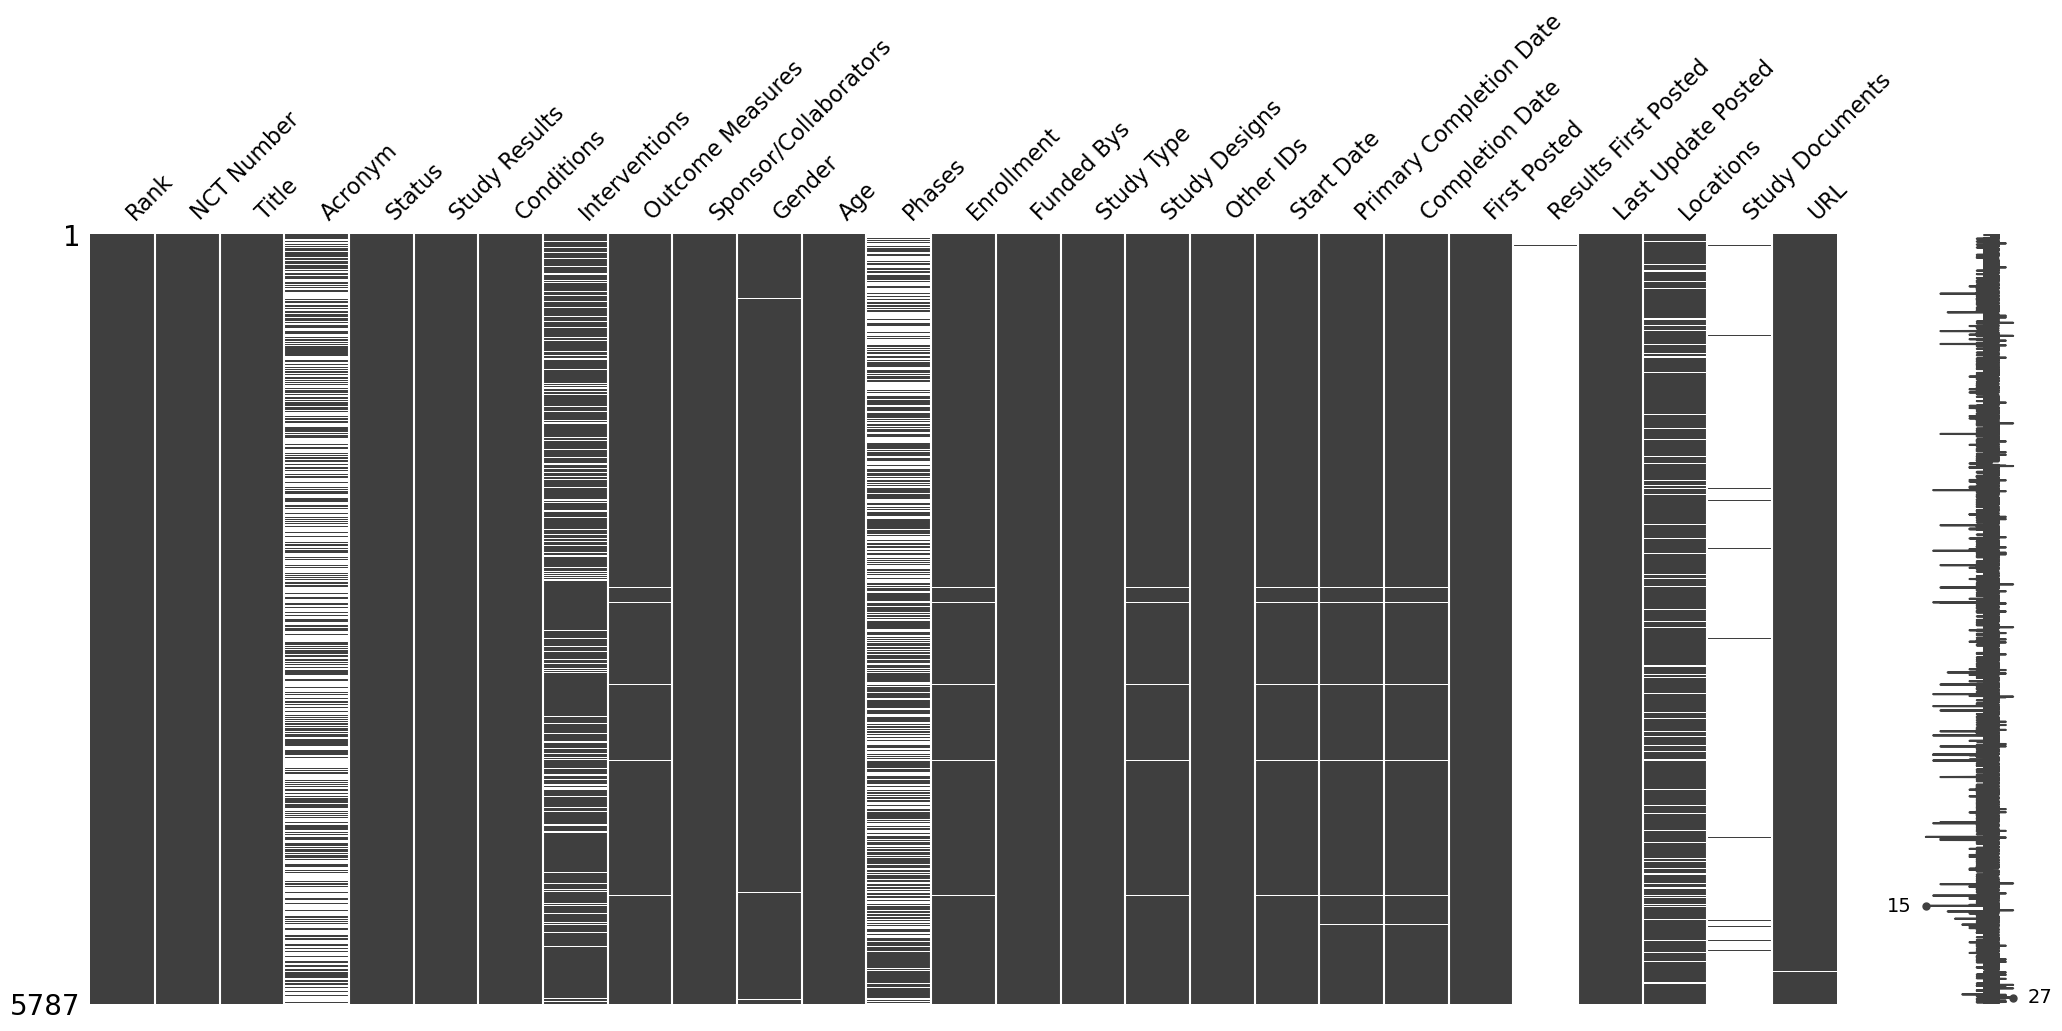

In [95]:
msno.matrix(df)

## 2. Drop rows with any missing values.



In [96]:
drop_rows = df.dropna()

In [97]:
drop_rows

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
667,668,NCT04491240,Evaluation of Safety and Efficiency of Method ...,COVID-19EXO,Completed,Has Results,Covid19|SARS-CoV-2 PNEUMONIA|COVID-19,Drug: EXO 1 inhalation|Drug: EXO 2 inhalation|...,Number of Participants With Non-serious and Se...,"State-Financed Health Facility ""Samara Regiona...",...,COVID-19 EXO,20-Jul-20,1-Oct-20,20-Oct-20,29-Jul-20,4-Nov-20,4-Nov-20,"Medical Centre Dinasty, Samara, Russian Federa...","""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT04491240
765,766,NCT04491994,Clearing the Fog: Is Hydroxychloroquine Effect...,COVID-19,Completed,Has Results,Covid19|Progression,Drug: HCQ,Number of Participants With Progression|Viral ...,UNICEF|Pak Emirates Military Hospital Rawalpin...,...,Sultan Mehmood Kamran 2,10-Apr-20,31-May-20,31-May-20,30-Jul-20,21-Aug-20,21-Aug-20,"Pak Emirates Military Hospital, Rawalpindi, Pu...","""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT04491994
1422,1423,NCT04332991,Outcomes Related to COVID-19 Treated With Hydr...,ORCHID,Completed,Has Results,Coronavirus|Acute Respiratory Infection|SARS-C...,Drug: Hydroxychloroquine|Drug: Placebo,COVID Outcomes Scale Score on Study Day 15 (14...,"Massachusetts General Hospital|National Heart,...",...,PETAL 05 Orchid,2-Apr-20,19-Jun-20,23-Jul-20,3-Apr-20,17-Mar-21,17-Mar-21,"University of Arizona, Tucson, Arizona, United...","""Study Protocol"", https://ClinicalTrials.gov/P...",https://ClinicalTrials.gov/show/NCT04332991
1743,1744,NCT04329923,The PATCH Trial (Prevention And Treatment of C...,PATCH,Terminated,Has Results,COVID-19,Drug: Hydroxychloroquine Sulfate 400 mg twice ...,Time to Release From Quarantine Time|Time to H...,"Ravi Amaravadi, MD|University of Pennsylvania",...,842838,9-Apr-20,11-Nov-20,13-Nov-20,1-Apr-20,10-Dec-20,10-Dec-20,"University of Pennsylvania, Philadelphia, Penn...","""Study Protocol"", https://ClinicalTrials.gov/P...",https://ClinicalTrials.gov/show/NCT04329923
2632,2633,NCT04390022,Sars-CoV-2/COVID-19 Ivermectin Navarra-ISGloba...,SAINT,Completed,Has Results,Covid-19|Coronavirus Infection|SARS-CoV-2 Infe...,Drug: Ivermectin|Drug: Placebo,Proportion of Patients With a Positive SARS-Co...,"Clinica Universidad de Navarra, Universidad de...",...,SAINT,31-Jul-20,17-Sep-20,9-Oct-20,15-May-20,17-Dec-20,17-Dec-20,"Clinica Universidad de Navarra, Pamplona, Nava...","""Statistical Analysis Plan"", https://ClinicalT...",https://ClinicalTrials.gov/show/NCT04390022
2954,2955,NCT04410159,Povidone-Iodine Vs Essential Oil Vs Tap Water ...,GARGLES,Completed,Has Results,COVID-19,Drug: Povidone-Iodine|Drug: Essential oils|Oth...,Number of Participants With Early Viral Cleara...,Universiti Sains Islam Malaysia|Universiti Keb...,...,USIMalaysia,22-Jun-20,29-Jun-20,6-Jul-20,1-Jun-20,21-Jul-20,21-Jul-20,"Universiti Kebangsaan Malaysia Medical Centre,...","""Study Protocol, Statistical Analysis Plan, an...",https://ClinicalTrials.gov/show/NCT04410159
3476,3477,NCT04331366,Bidirectional Oxygenation Valve in the Managem...,GO2 PEEP,Completed,Has Results,COVID-19,Device: GO2 PEEP MOUTHPIECE,Oxygen Saturation by Pulse Oximetry|Respirator...,Emory University,...,STUDY00000381,8-Apr-20,31-Aug-20,31-Aug-20,2-Apr-20,10-Feb-21,18-Feb-21,"Emory University Hospital, Atlanta, Georgia, U...","""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT04331366
4879,4880,NCT04402970,Dornase Alfa for ARDS in Patients With Severe ...,DORNASESARS2,Completed,Has Results,SARS-CoV 2|ARDS,Drug: Dornase Alfa Inhalation Solution,Change in Arterial Blood Oxygen Content to Fra...,University of Missouri-Columbia,...,2022206,19-Jun-20,31-Dec-20,31-Dec-20,27-May-20,14-Apr-21,14-Apr-21,"University of M

## 3. Drop columns with any missing values.


In [98]:
drop_columns = df.dropna(axis=1)

In [99]:
df.isna().sum()

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3306
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2462
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5751
Last Update Posted            0
Locations                   585
Study Documents            5605
URL                           3
dtype: int64

In [100]:
drop_columns.head()

,Rank,NCT Number,Title,Status,Study Results,Conditions,Sponsor/Collaborators,Age,Funded Bys,Study Type,First Posted,Last Update Posted
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,"Active, not recruiting",No Results Available,Covid19,Groupe Hospitalier Paris Saint Joseph,"18 Years and older (Adult, Older Adult)",Other,Interventional,8-Mar-21,8-Mar-21
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,United Medical Specialties,"18 Years and older (Adult, Older Adult)",Other,Interventional,20-Oct-20,20-Oct-20
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,Recruiting,No Results Available,covid19,University of Milano Bicocca,"18 Years and older (Adult, Older Adult)",Other,Observational,20-May-20,9-Nov-20
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,"Active, not recruiting",No Results Available,COVID,Hong Kong Sanatorium & Hospital,"Child, Adult, Older Adult",Industry,Observational,4-Jun-20,4-Jun-20
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Centre Hospitalier Régional d'Orléans|Centre d...,18 Years to 48 Years (Adult),Other,Observational,20-May-20,4-Jun-20


## 4. Fill missing values with a specific value.

In [101]:
df_filled = df.fillna('Null')
df_filled.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,9-Nov-20,22-Dec-20,30-Apr-21,8-Mar-21,Null,8-Mar-21,"Groupe Hospitalier Paris Saint-Joseph, Paris, ...",Null,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,2-Nov-20,15-Dec-20,29-Jan-21,20-Oct-20,Null,20-Oct-20,"Cimedical, Barranquilla, Atlantico, Colombia",Null,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,7-May-20,15-Jun-21,15-Jun-21,20-May-20,Null,9-Nov-20,"Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",Null,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,25-May-20,31-Jul-20,31-Aug-20,4-Jun-20,Null,4-Jun-20,"Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",Null,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,5-May-20,21-May,21-May,20-May-20,Null,4-Jun-20,"CHR Orléans, Orléans, France",Null,https://ClinicalTrials.gov/show/NCT04395924


## 5. Fill missing values using forward fill and backward fill methods.


In [102]:
df_ffill = df.ffill()
df_bfill = df.bfill()

In [103]:
df_ffill.isnull().sum()

Rank                        0
NCT Number                  0
Title                       0
Acronym                     0
Status                      0
Study Results               0
Conditions                  0
Interventions               0
Outcome Measures            0
Sponsor/Collaborators       0
Gender                      0
Age                         0
Phases                      0
Enrollment                  0
Funded Bys                  0
Study Type                  0
Study Designs               0
Other IDs                   0
Start Date                  0
Primary Completion Date     0
Completion Date             0
First Posted                0
Results First Posted       70
Last Update Posted          0
Locations                   0
Study Documents            19
URL                         0
dtype: int64

In [104]:
df_bfill.isnull().sum()

Rank                        0
NCT Number                  0
Title                       0
Acronym                     0
Status                      0
Study Results               0
Conditions                  0
Interventions               0
Outcome Measures            0
Sponsor/Collaborators       0
Gender                      0
Age                         0
Phases                      0
Enrollment                  0
Funded Bys                  0
Study Type                  0
Study Designs               0
Other IDs                   0
Start Date                  0
Primary Completion Date     0
Completion Date             0
First Posted                0
Results First Posted       43
Last Update Posted          0
Locations                   0
Study Documents            16
URL                         0
dtype: int64

## 6. Interpolate missing values.


In [105]:
df_interpolate = df['Enrollment'].interpolate(method='linear')

In [106]:
df_interpolate

0       1000.0
1         60.0
2        500.0
3       2500.0
4         50.0
         ...  
5782     716.0
5783     100.0
5784     500.0
5785      20.0
5786    1180.0
Name: Enrollment, Length: 5787, dtype: float64

## 7. Convert a column to a different data type.

In [107]:
df['Enrollment'] = df['Enrollment'].fillna(0).astype(int)

In [108]:
df['Enrollment']

0       1000
1         60
2        500
3       2500
4         50
        ... 
5782     716
5783     100
5784     500
5785      20
5786    1180
Name: Enrollment, Length: 5787, dtype: int32

## 8. Apply a function to transform the values of a column.


In [109]:
def categorize_age(description):
    if 'Child' in description:
        return 'Child'
    elif 'Adult' in description:
        return 'Adult'
    elif 'Older Adult' in description:
        return 'Older Adult'
    else:
        return 'Unknown'

In [110]:
df['Age Bracket'] = df['Age'].apply(categorize_age)

In [111]:
df[['Age' ,'Age Bracket']].head()

,Age,Age Bracket
0,"18 Years and older (Adult, Older Adult)",Adult
1,"18 Years and older (Adult, Older Adult)",Adult
2,"18 Years and older (Adult, Older Adult)",Adult
3,"Child, Adult, Older Adult",Child
4,18 Years to 48 Years (Adult),Adult


## 9. Normalize a column using Min-Max scaling.


In [112]:
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

In [113]:
df['Enrollment_Normalized'] = min_max_scaling(df['Enrollment'])

In [114]:
df[['Enrollment', 'Enrollment_Normalized']]

,Enrollment,Enrollment_Normalized
0,1000,0.000050
1,60,0.000003
2,500,0.000025
3,2500,0.000125
4,50,0.000003
...,...,...
5782,716,0.000036
5783,100,0.000005
5784,500,0.000025
5785,20,0.000001


## 10. Standardize a column (z-score normalization).

In [115]:
def z_score_normalization(column):
    return (column - column.mean()) / column.std()

In [116]:
df['Enrollment_Standardized'] = z_score_normalization(df['Enrollment'])

In [117]:
df[['Enrollment', 'Enrollment_Standardized', 'Enrollment_Normalized']]

,Enrollment,Enrollment_Standardized,Enrollment_Normalized
0,1000,-0.042656,0.000050
1,60,-0.044987,0.000003
2,500,-0.043896,0.000025
3,2500,-0.038936,0.000125
4,50,-0.045012,0.000003
...,...,...,...
5782,716,-0.043360,0.000036
5783,100,-0.044888,0.000005
5784,500,-0.043896,0.000025
5785,20,-0.045086,0.000001


## 11. Identify duplicate rows in the DataFrame.

In [118]:
df.duplicated().sum()

4

## 12. Drop duplicate rows.

In [119]:
duplicates = df.drop_duplicates()

In [120]:
duplicates.duplicated().sum()

0

## 13. Drop duplicate rows based on specific columns.

In [121]:
duplicates_cols = df.drop_duplicates(subset=['Rank', 'NCT Number'])

In [122]:
duplicates_cols.duplicated().sum()

0

## 14. Convert all string values in a column to lowercase.

In [123]:
lowercase = df['Title'].str.lower()

In [124]:
lowercase

0       diagnostic performance of the id now™ covid-19...
1       study to evaluate the efficacy of covid19-0001...
2       lung ct scan analysis of sars-cov2 induced lun...
3       the role of a private hospital in hong kong am...
4              maternal-foetal transmission of sars-cov-2
                              ...                        
5782    chronic pain management in primary care using ...
5783            association of comorbidities with covid19
5784    evaluating an online wellness intervention for...
5785                imaging immune activation in covid-19
5786    spinal manipulation and patient self-managemen...
Name: Title, Length: 5787, dtype: object

## 15. Remove leading and trailing spaces from string values in a column.

In [125]:
remove_spaces = df['Age'].str.strip()

## 16. Replace a specific substring in a column with another substring.

In [126]:
df['Phases'] = df['Phases'].str.replace('|', ' - ')

In [127]:
df['Phases']

0          Not Applicable
1       Phase 1 - Phase 2
2                     NaN
3                     NaN
4                     NaN
              ...        
5782       Not Applicable
5783                  NaN
5784       Not Applicable
5785        Early Phase 1
5786              Phase 3
Name: Phases, Length: 5787, dtype: object

## 17. Extract a substring from each value in a column.

In [128]:
substring = df['Title'].str[:5]
substring

0       Diagn
1       Study
2       Lung 
3       The R
4       Mater
        ...  
5782    Chron
5783    Assoc
5784    Evalu
5785    Imagi
5786    Spina
Name: Title, Length: 5787, dtype: object

## 18. Convert a column to datetime format.

In [129]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%Y-%m-%d',errors='coerce')

In [130]:
df['Start Date'].head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: Start Date, dtype: datetime64[ns]

## 19. Extract year, month, and day from a datetime column.

In [131]:
df['Start Year'] = df['Start Date'].dt.year
df['Start Month'] = df['Start Date'].dt.month
df['Start Day'] = df['Start Date'].dt.day

In [132]:
df[['Start Date' ,'Start Year', 'Start Month', 'Start Day']].head()

,Start Date,Start Year,Start Month,Start Day
0,NaT,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN


## 20. Filter rows based on a date range.

In [133]:
filtered_data = df[(df['Start Date'] >= '2020-01-01') & (df['Start Date'] <= '2021-12-31')]

In [134]:
filtered_data.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Last Update Posted,Locations,Study Documents,URL,Age Bracket,Enrollment_Normalized,Enrollment_Standardized,Start Year,Start Month,Start Day


## 21. Convert a categorical column to numerical using one-hot encoding.

In [135]:
df_one_hot_encoded = pd.get_dummies(df, columns=['Status'])

In [136]:
df_one_hot_encoded.head()

,Rank,NCT Number,Title,Acronym,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Status_Available,Status_Completed,Status_Enrolling by invitation,Status_No longer available,Status_Not yet recruiting,Status_Recruiting,Status_Suspended,Status_Temporarily not available,Status_Terminated,Status_Withdrawn
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,False,False,False,False,False,False,False,False,False,False
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,False,False,False,False,True,False,False,False,False,False
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,False,False,False,False,False,True,False,False,False,False
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,False,False,False,False,False,False,False,False,False,False
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,False,False,False,False,False,True,False,False,False,False


## 22. Convert a categorical column to numerical using label encoding.

In [137]:
label_encoder = LabelEncoder()
df['Status_Label'] = label_encoder.fit_transform(df['Status'])

In [138]:
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Locations,Study Documents,URL,Age Bracket,Enrollment_Normalized,Enrollment_Standardized,Start Year,Start Month,Start Day,Status_Label
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,"Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898,Adult,0.000050,-0.042656,NaN,NaN,NaN,0
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,"Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136,Adult,0.000003,-0.044987,NaN,NaN,NaN,6
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,"Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482,Adult,0.000025,-0.043896,NaN,NaN,NaN,7
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,"Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061,Child,0.000125,-0.038936,NaN,NaN,NaN,0
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,"CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924,Adult,0.000003,-0.045012,NaN,NaN,NaN,7


## 23. Group values in a categorical column and create a new column with grouped categories.

In [139]:
def phase_group(phase):
    if pd.isna(phase):
        return 'Other'
    if 'Phase 1' in phase or 'Phase 2' in phase:
        return 'Early'
    elif 'Phase 3' in phase or 'Phase 4' in phase:
        return 'Late'
    else:
        return 'Other'

In [140]:
df['Phase_Group'] = df['Phases'].apply(phase_group)

In [141]:
df[['Phases' ,'Phase_Group']]

,Phases,Phase_Group
0,Not Applicable,Other
1,Phase 1 - Phase 2,Early
2,NaN,Other
3,NaN,Other
4,NaN,Other
...,...,...
5782,Not Applicable,Other
5783,NaN,Other
5784,Not Applicable,Other
5785,Early Phase 1,Early


## 24. Merge two DataFrames based on a common column.

In [142]:
df2 = pd.DataFrame({
    'NCT Number': ['NCT04280705', 'NCT04372602', 'NCT04374019', 'NCT04372736', 'NCT04372441'],
    'Secondary_Info': ['Info1', 'Info2', 'Info3', 'Info4', 'Info5'],
    'Additional_Info': ['Add1', 'Add2', 'Add3', 'Add4', 'Add5'],
    'More_Info': ['More1', 'More2', 'More3', 'More4', 'More5']
})

In [143]:
merged_df = df.merge(df2, on='NCT Number')

In [144]:
merged_df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Enrollment_Normalized,Enrollment_Standardized,Start Year,Start Month,Start Day,Status_Label,Phase_Group,Secondary_Info,Additional_Info,More_Info
0,1740,NCT04372602,Duvelisib to Combat COVID-19,NaN,Recruiting,No Results Available,COVID-19,Drug: Duvelisib|Procedure: Peripheral blood dr...,Overall survival|Length of hospital stay|Lengt...,Washington University School of Medicine|Veras...,...,0.000001,-0.045066,NaN,NaN,NaN,7,Early,Info2,Add2,More2
1,2766,NCT04374019,Novel Agents for Treatment of High-risk COVID-...,NaN,Recruiting,No Results Available,COVID|Sars-CoV2,Drug: Ivermectin|Drug: Camostat Mesilate|Dieta...,Clinical Deterioration|Change in Viral Load|Ra...,Susanne Arnold|University of Kentucky,...,0.000012,-0.044541,NaN,NaN,NaN,7,Early,Info3,Add3,More3
2,2777,NCT04280705,Adaptive COVID-19 Treatment Trial (ACTT),NaN,Completed,Has Results,COVID-19,Other: Placebo|Drug: Remdesivir,Time to Recovery|Change From Baseline in Alani...,National Institute of Allergy and Infectious D...,...,0.000053,-0.042502,NaN,NaN,NaN,3,Late,Info1,Add1,More1


## 25. Concatenate two DataFrames vertically.

In [145]:
concatenated_df_vertical = pd.concat([df, df2], axis=0)

In [146]:
concatenated_df_vertical.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Enrollment_Normalized,Enrollment_Standardized,Start Year,Start Month,Start Day,Status_Label,Phase_Group,Secondary_Info,Additional_Info,More_Info
0,1.0,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,0.000050,-0.042656,NaN,NaN,NaN,0.0,Other,NaN,NaN,NaN
1,2.0,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,0.000003,-0.044987,NaN,NaN,NaN,6.0,Early,NaN,NaN,NaN
2,3.0,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,0.000025,-0.043896,NaN,NaN,NaN,7.0,Other,NaN,NaN,NaN
3,4.0,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,0.000125,-0.038936,NaN,NaN,NaN,0.0,Other,NaN,NaN,NaN
4,5.0,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,0.000003,-0.045012,NaN,NaN,NaN,7.0,Other,NaN,NaN,NaN


## 26. Concatenate two DataFrames horizontally.

In [147]:
concatenated_df_horizontal = pd.concat([df, df2], axis=1)

In [148]:
concatenated_df_horizontal.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Enrollment_Standardized,Start Year,Start Month,Start Day,Status_Label,Phase_Group,NCT Number,Secondary_Info,Additional_Info,More_Info
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,-0.042656,NaN,NaN,NaN,0,Other,NCT04280705,Info1,Add1,More1
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,-0.044987,NaN,NaN,NaN,6,Early,NCT04372602,Info2,Add2,More2
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,-0.043896,NaN,NaN,NaN,7,Other,NCT04374019,Info3,Add3,More3
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,-0.038936,NaN,NaN,NaN,0,Other,NCT04372736,Info4,Add4,More4
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,-0.045012,NaN,NaN,NaN,7,Other,NCT04372441,Info5,Add5,More5


## 27. Create a new column based on existing columns.

In [149]:
df['Acronym_Status'] = df['Acronym'] + ' - ' + df['Status']

In [150]:
df[['Title', 'Status', 'Acronym_Status']].head()

,Title,Status,Acronym_Status
0,Diagnostic Performance of the ID Now™ COVID-19...,"Active, not recruiting","COVID-IDNow - Active, not recruiting"
1,Study to Evaluate the Efficacy of COVID19-0001...,Not yet recruiting,COVID-19 - Not yet recruiting
2,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,Recruiting,TAC-COVID19 - Recruiting
3,The Role of a Private Hospital in Hong Kong Am...,"Active, not recruiting","COVID-19 - Active, not recruiting"
4,Maternal-foetal Transmission of SARS-Cov-2,Recruiting,TMF-COVID-19 - Recruiting


## 28. Discretize a continuous column into bins.

In [151]:
df['Enrollment_Bins'] = pd.cut(df['Enrollment'], bins=3, labels=['Low', 'Medium', 'High'])

In [152]:
df[['Enrollment', 'Enrollment_Bins']].head()

,Enrollment,Enrollment_Bins
0,1000,Low
1,60,Low
2,500,Low
3,2500,Low
4,50,Low


## 29. Create polynomial features from existing numerical columns. 

In [153]:
poly = PolynomialFeatures(degree=2)
enrollment_poly = poly.fit_transform(df[['Enrollment']].fillna(0))
df['Enrollment_Poly_1'] = enrollment_poly[:, 1]
df['Enrollment_Poly_2'] = enrollment_poly[:, 2]

In [154]:
df[['Enrollment', 'Enrollment_Poly_1', 'Enrollment_Poly_2']].head()

,Enrollment,Enrollment_Poly_1,Enrollment_Poly_2
0,1000,1000.0,1000000.0
1,60,60.0,3600.0
2,500,500.0,250000.0
3,2500,2500.0,6250000.0
4,50,50.0,2500.0
